# **IT와 비즈니스혁신 분류과제 (2010919 김지훈)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns          
import matplotlib.pyplot as plt 

In [3]:
pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# **심장질환 자료 분석**

In [7]:
heart = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/mining-main/heart.csv")
print(heart.columns)
display(heart.info())       
display(heart.head())
heart.describe()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 0, '')

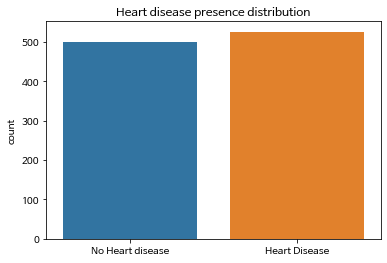

In [8]:
f = sns.countplot(x='target', data = heart)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

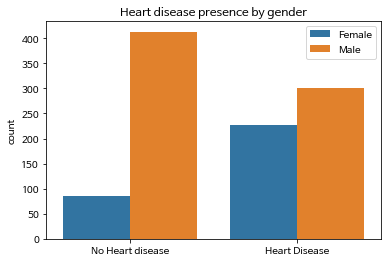

In [9]:
f = sns.countplot(x='target', data = heart, hue = 'sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


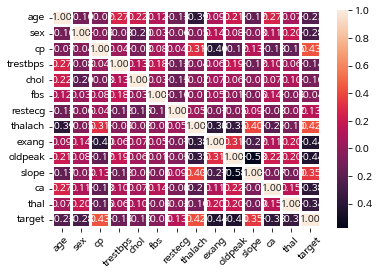

In [10]:
heart_map = sns.heatmap(heart.corr(method='pearson'),annot =True,fmt='.2f',linewidths=2)
heart_map.set_xticklabels(heart_map.get_xticklabels(), rotation =45);


### **자료분석을 통해 도출한 점**
*   현재 Heart 자료를 분석하였을 때, 남성이 여성보다 심장질환을 가지는 경우가 더 높음. 
*   심장질환에 가장 큰 영향을 주는 요소를 map을 통해서 확인하였음

: target과 요소 간의 관계가 1.0에 가까울수록 높은 상관관계를 가지고 있음. 

: CP(Chest pain, 가슴통증)가 가장 상관관계가 높고 그 다음으로는 thalach(최대심박동수)가 있음.

*   가슴통증의 원인으로는 장기적인 흡연이 있음. 담배 연기 속의 니코틴과 일산화탄소의 영향으로 혈액순환에 장애를 받게 되어 그로 인하여 혈압과 맥박이 상승하게 됨. 
* 따라서, 흡연상태(No, NotNow, Yes)가 각각 혈색소에 어떤 영향을 미치는지 살펴볼 것이다.





# **Health 자료 분석**

In [11]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/mining-main/health_data.csv", index_col='가입자일련번호')
print(health.columns)
display(health.info())       
display(health.head())
health.describe()      

#독립변수: 흡연상태(No(피우지 않는다) = -1, NotNow(이전에는 피웠으나 끊었다) = 0, Yes(현재도 피우고 있다) = 1)
#종속변수: 혈색소(정상범위: 12=<혈색소<=18일 경우, 1로 지정, 그 외의 경우는 0으로 지정)

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5C1단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  int64  
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5C1단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000 non-null  

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5C1단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,1,9,165,60,72.1,1.2,1.5,1,...,1.0,1.1,21.0,27.0,21.0,0.0,0.0,0,NaN,NaN
2,2020,27,2,13,150,65,81.0,0.8,0.8,1,...,1.0,0.5,18.0,15.0,15.0,0.0,0.0,0,NaN,NaN
3,2020,11,2,12,155,55,70.0,0.6,0.7,1,...,1.0,0.7,27.0,25.0,7.0,0.0,0.0,0,NaN,NaN
4,2020,31,1,13,160,70,90.8,1.0,1.0,1,...,1.0,1.2,65.0,97.0,72.0,0.0,0.0,1,0.0,0.0
5,2020,41,2,12,155,50,75.2,1.5,1.2,1,...,1.0,0.7,18.0,17.0,14.0,0.0,0.0,0,NaN,NaN


,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5C1단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,9998.000000,9999.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,34.100100,1.486200,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,1.119461,0.848484,27.58979,26.789851,38.098668,0.280456,0.581958,0.325100,0.175331,0.579514
std,0.0,12.394581,0.499835,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,0.489782,0.301012,17.88442,23.735687,58.184579,0.391990,0.493262,0.468436,0.380308,0.591269
min,2020.0,11.000000,1.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,27.000000,1.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,41.000000,1.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2020.0,44.000000,2.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,1.000000,1.000000,30.00000,31.000000,39.000000,0.500000,1.000000,1.000000,0.000000,1.000000
max,2020.0,49.000000,2.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,1.000000,1.000000,2.000000


### **결측치 처리 및 데이터 전처리**

In [12]:
print(health.isnull().sum())

기준년도              0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5C1단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
dtype: int64


In [13]:
#독립변수로 활용할 흡연상태의 결측치 제거
#종속변수로 활용할 혈색소 결측치 제거

health = health.dropna(subset = ['혈색소'], axis=0)   

print("\n혈색소 결측만 제거: ", health.shape)
print(health.isna().sum()) 

health = health.dropna(subset = ['흡연상태'], axis=0)   

print("\n흡연상태 결측만 제거: ", health.shape)
print(health.isna().sum()) 

health = health.dropna(subset = ['음주여부'], axis=0)   

print("\n음주여부 결측만 제거: ", health.shape)
print(health.isna().sum()) 

health = health.dropna(subset = ['총콜레스테롤'], axis=0)  
health = health.dropna(subset = ['LDL콜레스테롤'], axis=0)  
health = health.dropna(subset = ['요단백'], axis=0)  
health = health.dropna(subset = ['치아우식증유무'], axis=0)  


혈색소 결측만 제거:  (9912, 29)
기준년도              0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5C1단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)        0
총콜레스테롤         5868
트리글리세라이드       5868
HDL콜레스테롤       5868
LDL콜레스테롤       5935
혈색소               0
요단백              51
혈청크레아티닌           0
(혈청지오티)AST        0
(혈청지오티)ALT        0
감마지티피             0
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6661
치석             6661
dtype: int64

흡연상태 결측만 제거:  (9910, 29)
기준년도              0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5C1단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)        0
총콜레스테롤         5866
트리글리세라이드       5866
HDL콜레스테롤       5866
LDL콜레스테롤       5

0.0    740
0.5    286
1.0    223
Name: 흡연상태, dtype: int64


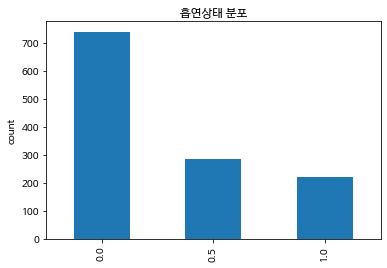

In [14]:
# No(피우지 않는다) = -1, NotNow(이전에는 피웠으나 끊었다) = 0, Yes(현재도 피우고 있다) = 1
print(health['흡연상태'].value_counts())

health['흡연상태'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('흡연상태 분포')
plt.show()

### **의사결정나무로 분석하기**

In [15]:
health = health.astype('int')

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.iloc[:,23:]
y = health['혈색소']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.948
시험용 데이터 정확도: 0.898


In [17]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.938
시험용 데이터 정확도: 0.936


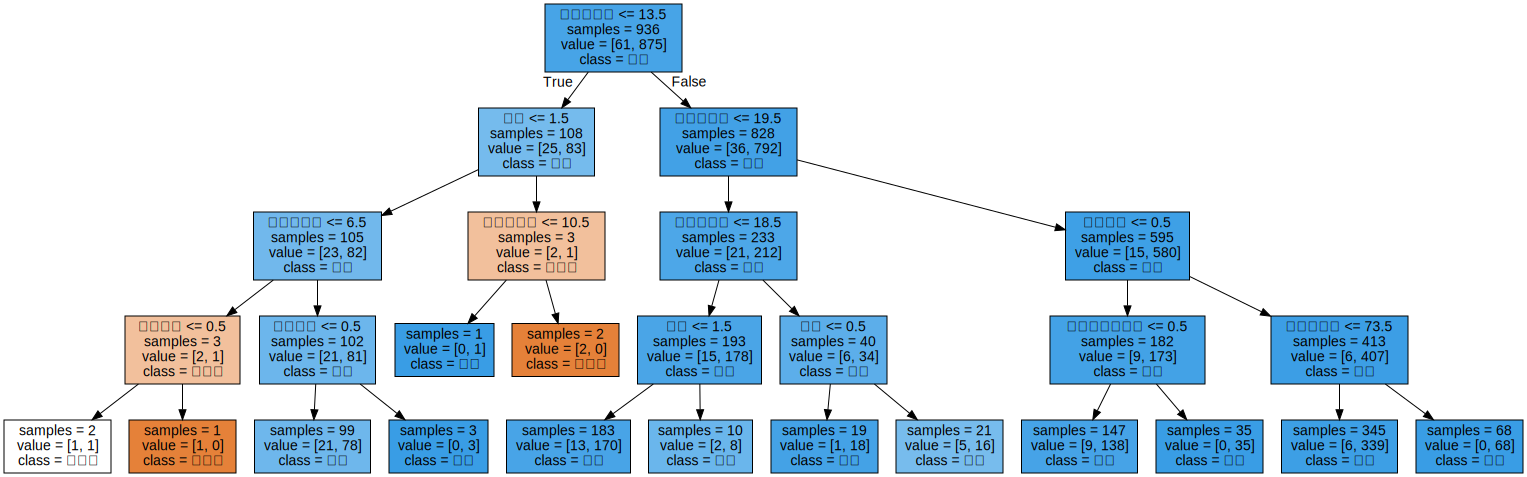

In [18]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree, out_file="tree.dot", class_names=[ "비정상", "정상"],
                feature_names=health.columns[23:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))


In [19]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.77185231 0.01819391 0.04454011 0.         0.01471519 0.15069847]


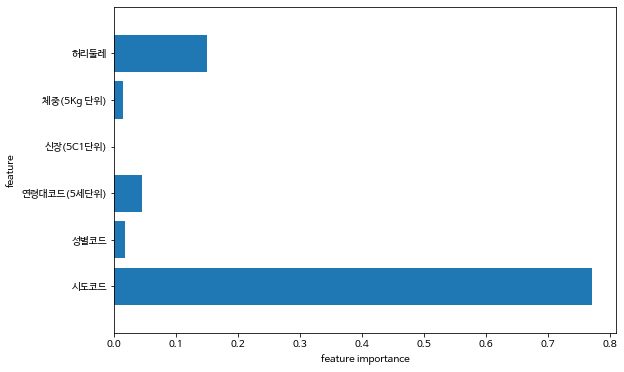

In [20]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[23:])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[1:])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_health(tree)

### **랜덤 포레스트로 분석하기**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


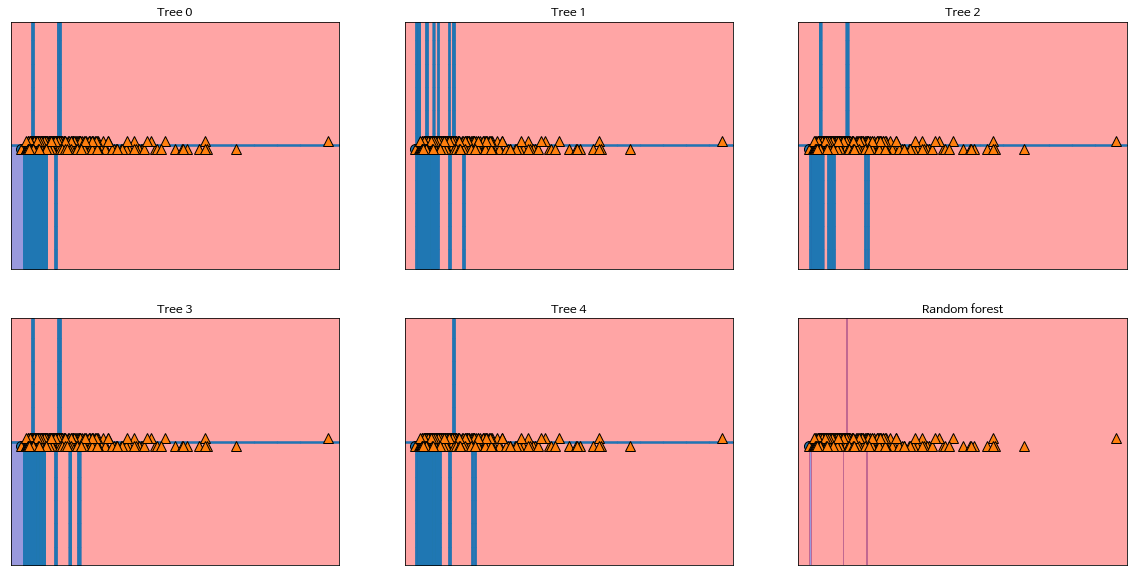

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [22]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.948
시험용 데이터 세트 정확도: 0.933


In [23]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.938
시험용 데이터 정확도: 0.936


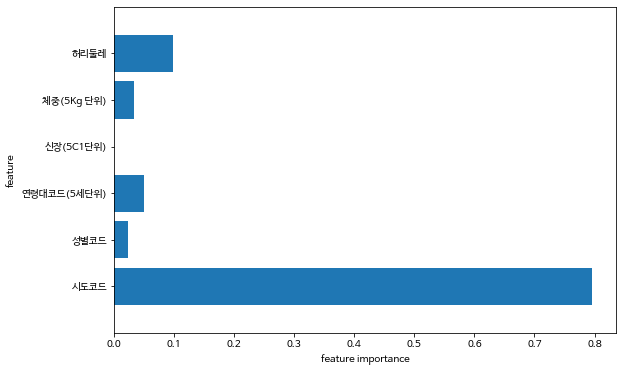

In [24]:
plot_feature_importances_health(forest)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

# **그리드 서치로 분류모델 평가하기**

In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [27]:
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.932692,10,0.929487,0.935897,0.932692
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.934829,1,0.932692,0.935897,0.935897
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.930556,15,0.929487,0.935897,0.926282
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.932692,10,0.929487,0.935897,0.932692
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.934829,1,0.932692,0.935897,0.935897
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.931624,14,0.932692,0.935897,0.926282
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.933761,3,0.932692,0.935897,0.932692
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.932692,10,0.929487,0.935897,0.932692
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.932692,10,0.929487,0.935897,0.932692
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.933761,3,0.932692,0.935897,0.932692


In [28]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.9348


In [29]:
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.936


# **Health 데이터분류 결론**


1. 흡연여부를 독립변수로 지정하였음. 흡연여부의 경우를 총 3가지로 나눠서 분석함, 

: No(피우지 않는다) = -1, NotNow(이전에는 피웠으나 끊었다) = 0, Yes(현재도 피우고 있다) = 1

:종속변수로는 혈색소를 지정, 혈색소의 정상범위: 12=<혈색소<=18일 경우, 1로 지정, 그 외의 경우는 0으로 지정

2. 의사결정나무와 랜덤 포레스트를 통해 혈색소와 흡연여부 간의 상관관계를 파악할 수 있었음. 

: 흡연상태가 0.5보다 작은 상태(현재는 피우지 않거나 전혀 피우지 않은 경우)의 경우, 혈색소는 정상으로 나옴


3.   의사결정나무와 랜덤 포레스트 분류 시, 결정 요소가 큰 요인은 둘다 시도코드였음.

: 이는 의사결정나무를 생성하는데, 시도별 차이가 중요함을 의미할 뿐, 혈색소가 정상치인지 여부를 확인할 수 없음. 

4. 그리드 서치로 분류모델을 평가한 결과, 

: GridSearchCV 최고 정확도: 0.9348/ 시험용 데이터 세트 정확도: 0.936

= 분류 분석 결과를 신뢰할 수 있음. 


